In [369]:
import os
import math

import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn.model_selection import KFold



In [370]:
from keras.datasets import mnist
import tensorflow as tf


In [371]:
imageDir = "dataset/all"
localImages = []
for filename in os.listdir(imageDir):
    localImage = mpimg.imread(os.path.join(imageDir, filename))
    if (filename is not None):
        localImages.append(localImage)
        
localImages = np.array(localImages)

X = localImages[:20]
print (X.shape)


(20, 960, 640, 3)


In [372]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print (X.shape)

(20, 1843200)


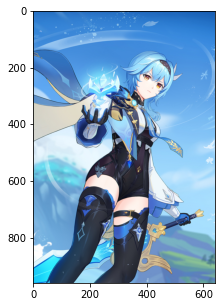

In [373]:
def plotImage(X):
    plt.figure(figsize=(5, 5))
    plt.imshow(X.reshape(960,640,3))
    plt.show()
    plt.close()

plotImage(X[9, :])


(20, 20) (20,)
min: 0.0
max: 1.0


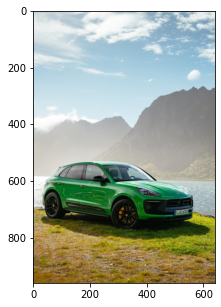

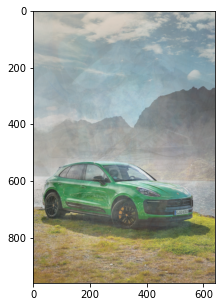

In [374]:
X_norm = X / 255.
X_norm = X_norm - X_norm.mean(axis=0)
cov = np.cov(X_norm, rowvar=True)
U,S,V = np.linalg.svd(cov)
print (U.shape, S.shape)
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())
plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])


In [375]:
test_datavalue = 'vecs.npy'

path = tf.keras.utils.get_file('mnist.npz', test_datavalue)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

print(train_examples.shape)
print(test_examples.shape)


(60000, 28, 28)
(10000, 28, 28)


In [376]:
data = np.load("dataset/1.2/vecs.npy",allow_pickle = True)
parts = ["1_pos"]
dict = data.item()
labels = []
embeddings = []

def createNumpyArrayFromDict(pos):
    for l in dict[pos]:
        for e in dict[pos][l]:
            labels.append(l)
            embeddings.append(e)

def permieateOrder(list1, list2):
        
    connection = list(zip(list1,list2))
    np.random.shuffle(connection)
    temp1, temp2 = zip(*connection)
    list1 = np.array(temp1)
    list2 = np.array(temp2)
    return list1, list2

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


for part in parts:
    createNumpyArrayFromDict(part)

numpy_embed = np.array(embeddings)
numpy_labels = np.array(labels)

numpy_labels, numpy_embed = unison_shuffled_copies(numpy_labels, numpy_embed)
#numpy_embed,numpy_labels = permieateOrder(numpy_embed,numpy_labels)

print(numpy_labels)
print(numpy_embed)

print(len(numpy_embed))
print(len(numpy_labels))


[8 5 1 ... 7 5 6]
[[-0.      -0.      -0.      ... -0.      -0.      -0.     ]
 [-0.      93.15913 -0.      ... -0.      -0.      -0.     ]
 [-0.      -0.      -0.      ... -0.      -0.      -0.     ]
 ...
 [-0.      -0.      -0.      ... -0.      -0.      -0.     ]
 [-0.      -0.      -0.      ... -0.      -0.      15.1914 ]
 [-0.      -0.      -0.      ... -0.      -0.      -0.     ]]
1258
1258


2.1
-----------------------------
------------------------------

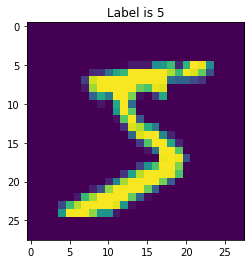

In [377]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()


Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


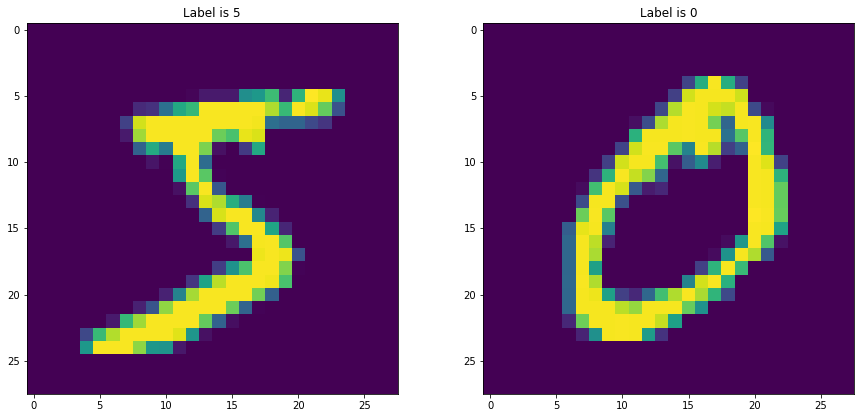

In [378]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [379]:
28*28

784

In [380]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]
#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)
Tr_set.shape

(500, 784)

In [381]:
def predict(X,k):
    num_test=X.shape[0]
    
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    for i in range(num_test):
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        distances=np.sqrt(np.sum(np.square(np.abs(Tr_set-X[i,:])),axis=1))

        k_closest = np.argsort(distances)[:k]
        Lpred[i]=Ltr_set[k_closest]
    return Lpred
 

In [ ]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predictedk=predict(Test_images,1)
print("Accuracy:", np.mean(Labels_predictedk==L_test))



500
10000
Accuracy: 0.8294


2.2
-------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

Part 1

In [382]:
from statistics import mode

def predictCrossKNN(val_data,train_data,trainL,k):
    num_test=val_data.shape[0]
    
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    for i in range(num_test):
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        distances=np.sqrt(np.sum(np.square(np.abs(train_data-val_data[i,:])),axis=1))
        
        k_closest = np.argsort(distances)[:k]

        Lpred[i]=mode(trainL[k_closest])
    return Lpred

In [383]:
def randomData():
    num_sample=500
    random_train_data, random_label_data = unison_shuffled_copies(Xtr,Ltr)
    Tr_set_random=random_train_data[:num_sample,:,:]
    Ltr_set_random=random_label_data[:num_sample]
    #Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

    Tr_set_random=Tr_set_random.reshape(num_sample,Tr_set_random.shape[1]*Tr_set_random.shape[2]).astype(int)
    Tr_set_random.shape
    return Tr_set_random, Ltr_set_random
    


In [390]:
def crossValidationKNN(train_data, train_label, fold):

    kfold = KFold(n_splits=fold)
    ac = []
    k_ac = []

    for k in range(1,10):
        for train, val in kfold.split(train_data):
            train_set = train_data[train]
            val_set = train_data[val]

            train_label_set = train_label[train]
            val_label_set = train_label[val]

            label_predict = predictCrossKNN(val_set, train_set, train_label_set, k)
            ac.append(np.mean(label_predict==val_label_set))
        
        ac_mean = np.mean(ac)
        k_ac.append(ac_mean)
        
    return(k_ac)

def crossValidation(train_data, train_label, fold, k):

    kfold = KFold(n_splits=fold)
    ac = []

    for train, val in kfold.split(train_data):
        train_set = train_data[train]
        val_set = train_data[val]

        train_label_set = train_label[train]
        val_label_set = train_label[val]

        label_predict = predictCrossKNN(val_set, train_set, train_label_set, k)
        ac.append(np.mean(label_predict==val_label_set))
    

        
    return(ac)


In [394]:
from collections import Counter

best_k_value = []
best_k_acc = []
fold = 3
for i in range(1,20):  
    T_Data,L_data = randomData()
    k_ac=crossValidationKNN(T_Data,L_data,fold)
    best_k_value.append(np.argmax(k_ac)+1)
    best_k_acc.append(k_ac[np.argmax(k_ac)])

print(best_k_value)

[4, 1, 4, 4, 5, 1, 4, 1, 4, 1, 1, 4, 1, 4, 1, 3, 4, 1, 1]


In [395]:
value = Counter(best_k_value)
value.most_common(1)[0][0]
print( value.most_common(1)[0][0])

1


In [396]:

final_Acc = []
acc_value = predict(Test_images, value.most_common(1)[0][0])
final_Acc.append(np.mean(acc_value==L_test))
print('The best K value is ',value.most_common(1)[0][0], ", which is the acc value" , final_Acc[0])

The best K value is  1 , which is the acc value 0.8294


Next par 3.1
--------------------------------------------
--------------------------------------------

In [ ]:
from sklearn.svm import SVC
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, f1_score
from sklearn import svm

In [ ]:
iris = datasets.load_iris()# Select 2 features / variables



X = iris.data[:,:4] #All features
y = iris.target
feature_names = iris.feature_names[:4]
classes = iris.target_names

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
C = 1
linear_OvO   = svm.SVC(kernel='linear', decision_function_shape="ovo", C=C).fit(X_train, Y_train)
poly_OvO   = svm.SVC(kernel='poly', decision_function_shape="ovo", degree=3, gamma='auto', C=C).fit(X_train, Y_train)
rbf_OvO   = svm.SVC(kernel='rbf', decision_function_shape="ovo", gamma=0.5, C=C).fit(X_train, Y_train)

linear_OvR   = svm.SVC(kernel='linear', decision_function_shape="ovr", C=C).fit(X_train, Y_train)
poly_OvR  = svm.SVC(kernel='poly', decision_function_shape="ovr", degree=3, gamma='auto', C=C).fit(X_train, Y_train)
rbf_OvR  = svm.SVC(kernel='rbf', decision_function_shape="ovr", gamma=0.5, C=C).fit(X_train, Y_train)

h = 0.02


In [ ]:
# title for the plots
titles = ['SVC with linear kernel (OVR)',
          'SVC with RBF kernel (OVR)',
          'SVC with polynomial kernel (OVR)',
          'SVC with linear kernel(OVO)',
          'SVC with RBF kernel (OVO)',
          'SVC with polynomial kernel (OVO)']


for i, clf in enumerate((linear_OvO, poly_OvO, rbf_OvO, linear_OvR, poly_OvR, rbf_OvR)):
    
    pred = clf.predict(X_test)
    f1 = f1_score(pred,Y_test, average=None)
    print(titles[i],"has accuracy", np.mean(pred==Y_test), "\n with a F1 score of: ", f1)
    matrix = confusion_matrix(pred, Y_test)
    print(matrix)#.confusion_matrix)


SVC with linear kernel (OVR) has accuracy 1.0 
 with a F1 score of:  [1. 1. 1.]
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
SVC with RBF kernel (OVR) has accuracy 1.0 
 with a F1 score of:  [1. 1. 1.]
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
SVC with polynomial kernel (OVR) has accuracy 1.0 
 with a F1 score of:  [1. 1. 1.]
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
SVC with linear kernel(OVO) has accuracy 1.0 
 with a F1 score of:  [1. 1. 1.]
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
SVC with RBF kernel (OVO) has accuracy 1.0 
 with a F1 score of:  [1. 1. 1.]
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
SVC with polynomial kernel (OVO) has accuracy 1.0 
 with a F1 score of:  [1. 1. 1.]
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


Part 3.1.3 /3.1.4
------------------

In [ ]:
clf = svm.SVC(kernel='linear',decision_function_shape='ovr', C=1)
clf.fit(X_train, Y_train)
w = clf.coef_[0]

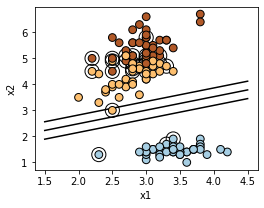

blue
[3.3 1.7]
[3.4 1.9]
[2.3 1.3]
yellow
[3.2 4.8]
[2.5 4.9]
[3. 5.]
[2.2 4.5]
[2.9 4.7]
[2.5 3. ]
[2.8 4.5]
[3.1 4.9]
[3.  4.5]
[3.3 4.7]
[2.8 4.6]
[2.7 5.1]
red
[3.2 5.1]
[3.  4.9]
[3.  5.8]
[2.5 5. ]
[3.  5.1]
[2.7 4.9]
[2.8 4.8]
[2.8 5.1]
[2.5 4.5]
[3.  4.8]
[2.2 5. ]


In [ ]:
# get the separating hyperplane
a = -w[1] / w[2]

xx = np.linspace(1.5, 4.5)


yy = a * xx - (clf.intercept_[0]) / w[2]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 1], clf.support_vectors_[:, 2], s=200, facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X_train[:, 1], X_train[:, 2], c=Y_train, zorder=10, s=60, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

#print(len(clf.support_vectors_))
#print(clf.support_)# The indices for the support vectors
#print(clf.n_support_)# how many suport vectors are there for each class
i = 0
print("blue")
for j in range(clf.n_support_[0]):
    print(clf.support_vectors_[i][1:3])
    i += 1

print("yellow")
for j in range(clf.n_support_[1]):
    print(clf.support_vectors_[i][1:3])
    i += 1
    
print("red")
for j in range(clf.n_support_[2]):
    print(clf.support_vectors_[i][1:3])
    i += 1



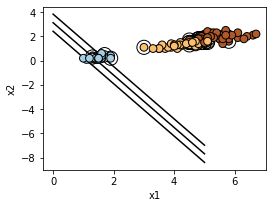

blue
[1.7 0.5]
[1.9 0.2]
[1.3 0.3]
yellow
[4.8 1.8]
[4.9 1.5]
[5.  1.7]
[4.5 1.5]
[4.7 1.4]
[3.  1.1]
[4.5 1.3]
[4.9 1.5]
[4.5 1.5]
[4.7 1.6]
[4.6 1.5]
[5.1 1.6]
red
[5.1 2. ]
[4.9 1.8]
[5.8 1.6]
[5.  1.9]
[5.1 1.8]
[4.9 1.8]
[4.8 1.8]
[5.1 1.5]
[4.5 1.7]
[4.8 1.8]
[5.  1.5]


In [ ]:
# get the separating hyperplane
a = -w[2] / w[3]

xx = np.linspace(0, 5)


yy = a * xx - (clf.intercept_[0]) / w[3]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin 
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 2], clf.support_vectors_[:, 3], s=200, facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X_train[:, 2], X_train[:, 3], c=Y_train, zorder=10, s=60, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

i = 0
print("blue")
for j in range(clf.n_support_[0]):
    print(clf.support_vectors_[i][2:4])
    i += 1

print("yellow")
for j in range(clf.n_support_[1]):
    print(clf.support_vectors_[i][2:4])
    i += 1
    
print("red")
for j in range(clf.n_support_[2]):
    print(clf.support_vectors_[i][2:4])
    i += 1

